# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

c:\Users\T\miniconda3\envs\dsi_participant\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Your code here

import matplotlib.pyplot as plt
import numpy as np

#training and test sets
# Explore the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")



Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [3]:
#dimension of images
img_height, img_width, num_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
print(f"Image dimensions: {img_height}x{img_width}x{num_channels}")

Image dimensions: 32x32x3


In [4]:
#number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

Number of classes: 100


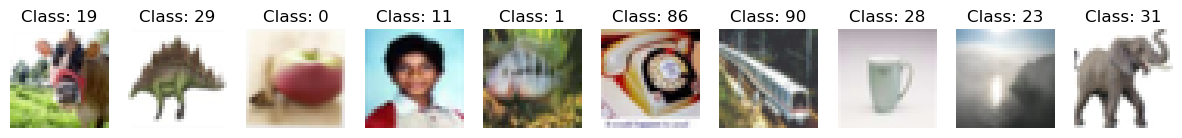

In [5]:
#few examples from the training set
num_examples = 10
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
for i in range(num_examples):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Class: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your code here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converted the labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new datasets
print(f"New training data shape: {x_train.shape}")
print(f"New training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")



New training data shape: (40000, 32, 32, 3)
New training labels shape: (40000, 100)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Embedding, LSTM


# Your code here

model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [ ]:
# loss = categorical (Categorical cross-entropy is a suitable loss function for multi-class classification problems)
# optimizer = adam (Adam optimizer is widely used because it combines the advantages of both the Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp) optimizers)
                    # whicn can lead to faster convergence and better performance.)

In [9]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary to verify the compilation
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 


 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (De

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

Epochs = 20

This is a reasonable starting point that allows the model to learn and demonstrate trends in accuracy and loss. Its no to high to risk overfitting.

In [12]:
# Your code here
# Train model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val)
)

Epoch 1/20
1250/1250 [==============================] - 33s 26ms/step - loss: 3.7014 - accuracy: 0.1360 - val_loss: 3.1832 - val_accuracy: 0.2252
Epoch 2/20
1250/1250 [==============================] - 30s 24ms/step - loss: 2.8748 - accuracy: 0.2809 - val_loss: 2.8233 - val_accuracy: 0.2894
Epoch 3/20
1250/1250 [==============================] - 30s 24ms/step - loss: 2.4368 - accuracy: 0.3719 - val_loss: 2.5123 - val_accuracy: 0.3681
Epoch 4/20
1250/1250 [==============================] - 31s 25ms/step - loss: 2.1027 - accuracy: 0.4437 - val_loss: 2.4625 - val_accuracy: 0.3788
Epoch 5/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7898 - accuracy: 0.5130 - val_loss: 2.4531 - val_accuracy: 0.3902
Epoch 6/20
1250/1250 [==============================] - 30s 24ms/step - loss: 1.4835 - accuracy: 0.5883 - val_loss: 2.5222 - val_accuracy: 0.3906
Epoch 7/20
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2008 - accuracy: 0.6565 - val_loss: 2.7845 -

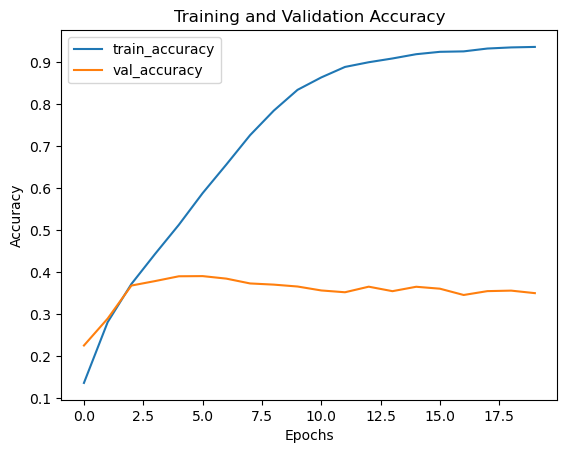

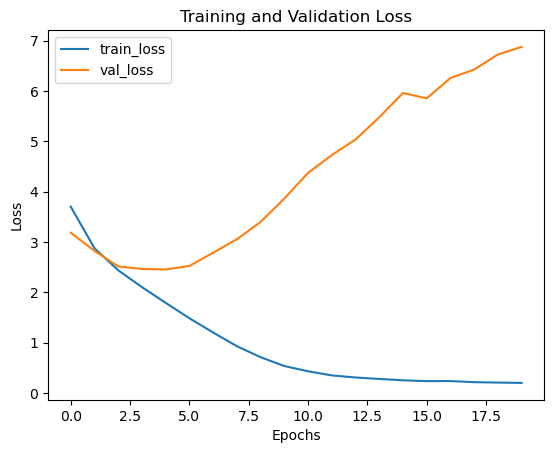

In [13]:
# Plot the training and validation accuracy/loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [14]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate F1-score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1-Score: {f1:.4f}")

# Classification report
report = classification_report(y_true, y_pred_classes)
print(report)

Test Accuracy: 0.3553
313/313 [==============================] - 2s 7ms/step
F1-Score: 0.3547
              precision    recall  f1-score   support

           0       0.50      0.66      0.57       100
           1       0.47      0.53      0.50       100
           2       0.30      0.24      0.27       100
           3       0.10      0.21      0.14       100
           4       0.13      0.14      0.13       100
           5       0.39      0.19      0.26       100
           6       0.32      0.43      0.37       100
           7       0.31      0.42      0.36       100
           8       0.44      0.51      0.47       100
           9       0.33      0.51      0.40       100
          10       0.21      0.15      0.17       100
          11       0.23      0.20      0.21       100
          12       0.47      0.33      0.39       100
          13       0.30      0.28      0.29       100
          14       0.21      0.30      0.25       100
          15       0.25      0.23      0.

A) Model accuracy of 0.3553/ 35.53% on the test set suggests there is significant room for improvement. This score indicates that the model struggles to correctly classify a large portion of the test images, which could be due to the complexity of the CIFAR-100 dataset or the need for further model optimization.

B) F1-Score Metric ( To measure harmonic mean of precision and recall, which providessingle metric between both).

C) The F1-score 0.33547 / 35.47% being close to the accuracy value shows that the model's precision and recall are balanced, but both are relatively low. This further confirms that the model is not performing well.


Both the test accuracy and F1-score indicate that while the model can make some correct predictions, it is not yet reliable enough for practical use. Further improvements and optimizations, such as more advanced architectures, hyperparameter tuning, and additional regularization techniques, could enhance the model's performance.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

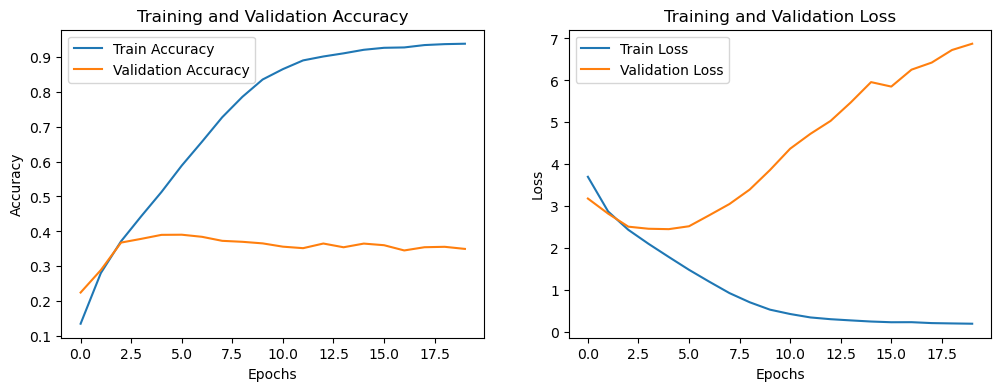

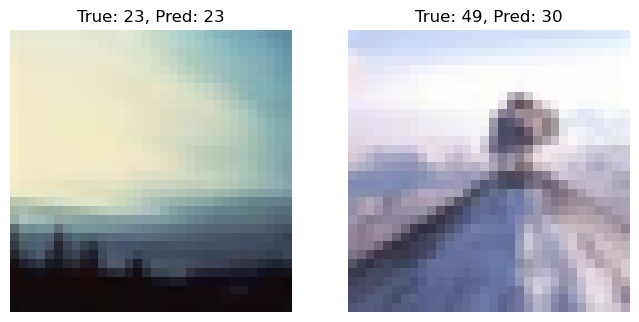

Classification probabilities for correctly classified image:
[2.9603360e-21 1.1917871e-13 4.8074761e-24 3.9438850e-17 2.2648002e-13
 4.3474993e-14 3.0283997e-29 2.8257720e-23 6.3307303e-21 6.4873357e-11
 4.1127206e-12 2.2591385e-14 1.2071231e-11 4.6015409e-16 1.4847078e-18
 1.9701789e-09 3.0665100e-19 1.0941787e-18 7.8398017e-22 7.1447862e-22
 5.2504156e-12 1.4339025e-21 1.1885925e-14 6.1957830e-01 3.6224098e-19
 6.2819940e-09 1.0354932e-18 9.6757982e-16 5.2852840e-11 2.1115996e-15
 1.0071941e-17 1.7980144e-15 4.7968482e-14 1.9505599e-09 7.4521668e-22
 5.7197060e-22 3.6751674e-16 1.4658217e-14 5.8300791e-19 1.5311646e-12
 2.0051354e-10 3.0177937e-19 2.0930496e-23 2.2896250e-26 2.1809754e-21
 1.6970187e-19 1.3770448e-16 6.4215442e-08 6.5442927e-26 3.9656393e-02
 7.8475685e-14 5.6414779e-15 3.4138580e-13 4.2278830e-23 4.2594996e-15
 1.3446086e-21 3.8354275e-13 2.8736119e-16 3.0978148e-15 5.4000684e-13
 1.0623127e-02 2.2349780e-15 6.0473789e-19 9.7310747e-21 3.3917109e-22
 2.4519785e-13 1

In [15]:
# Your code here

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Select images from the test set
correct_index = np.where(y_pred_classes == y_true)[0][0]
incorrect_index = np.where(y_pred_classes != y_true)[0][0]

# Plot correctly classified image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"True: {y_true[correct_index]}, Pred: {y_pred_classes[correct_index]}")
plt.axis('off')

# Plot incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f"True: {y_true[incorrect_index]}, Pred: {y_pred_classes[incorrect_index]}")
plt.axis('off')

plt.show()

# Display model's classification probabilities
print("Classification probabilities for correctly classified image:")
print(y_pred[correct_index])

print("\nClassification probabilities for incorrectly classified image:")
print(y_pred[incorrect_index])





In [20]:
report = classification_report(y_true, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       100
           1       0.49      0.42      0.45       100
           2       0.29      0.22      0.25       100
           3       0.42      0.13      0.20       100
           4       0.13      0.15      0.14       100
           5       0.40      0.35      0.37       100
           6       0.59      0.38      0.46       100
           7       0.41      0.49      0.45       100
           8       0.33      0.68      0.45       100
           9       0.81      0.47      0.59       100
          10       0.23      0.18      0.20       100
          11       0.39      0.16      0.23       100
          12       0.42      0.46      0.44       100
          13       0.45      0.29      0.35       100
          14       0.46      0.27      0.34       100
          15       0.34      0.16      0.22       100
          16       0.49      0.54      0.51       100
          17       0.56    

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Epoch 1/20
1250/1250 [==============================] - 54s 43ms/step - loss: 4.1485 - accuracy: 0.0619 - val_loss: 3.7024 - val_accuracy: 0.1334
Epoch 2/20
1250/1250 [==============================] - 42s 34ms/step - loss: 3.6535 - accuracy: 0.1380 - val_loss: 3.3755 - val_accuracy: 0.1895
Epoch 3/20
1250/1250 [==============================] - 40s 32ms/step - loss: 3.4279 - accuracy: 0.1755 - val_loss: 3.2115 - val_accuracy: 0.2164
Epoch 4/20
1250/1250 [==============================] - 41s 33ms/step - loss: 3.2947 - accuracy: 0.1993 - val_loss: 3.0183 - val_accuracy: 0.2546
Epoch 5/20
1250/1250 [==============================] - 41s 33ms/step - loss: 3.2002 - accuracy: 0.2167 - val_loss: 2.9079 - val_accuracy: 0.2837
Epoch 6/20
1250/1250 [==============================] - 42s 33ms/step - loss: 3.1212 - accuracy: 0.2303 - val_loss: 2.8463 - val_accuracy: 0.2916
Epoch 7/20
1250/1250 [==============================] - 41s 32ms/step - loss: 3.0629 - accuracy: 0.2464 - val_loss: 2.7728 -

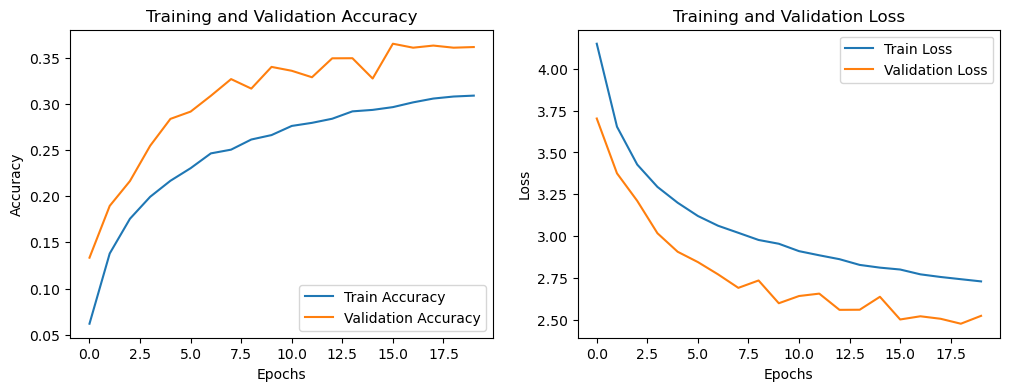

In [18]:
# Your code here

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Redefine the model with Dropout layers
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_val, y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")

# Calculate F1-score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Enhanced Model F1-Score: {f1:.4f}")

# Classification report
report = classification_report(y_true, y_pred_classes)
print(report)

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()




Data Augmentation: ImageDataGenerator applies random transformations to the training images, increasing the diversity of the dataset.

Increases the diversity of the training data, allowing the model to learn more robust features and reducing the risk of overfitting.

Dropout: Dropout layers with a dropout rate of 0.25 are added after convolutional layers and a dropout rate of 0.5 after the dense layer to reduce overfitting.


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20
1250/1250 [==============================] - 51s 41ms/step - loss: 2.7164 - accuracy: 0.3134 - val_loss: 2.5380 - val_accuracy: 0.3545
Epoch 2/20
1250/1250 [==============================] - 46s 37ms/step - loss: 2.7125 - accuracy: 0.3123 - val_loss: 2.5389 - val_accuracy: 0.3542
Epoch 3/20
1250/1250 [==============================] - 44s 36ms/step - loss: 2.7026 - accuracy: 0.3149 - val_loss: 2.4370 - val_accuracy: 0.3799
Epoch 4/20
1250/1250 [==============================] - 43s 35ms/step - loss: 2.6873 - accuracy: 0.3178 - val_loss: 2.4469 - val_accuracy: 0.3733
Epoch 5/20
1250/1250 [==============================] - 43s 35ms/step - loss: 2.6798 - accuracy: 0.3212 - val_loss: 2.3685 - val_accuracy: 0.3828
Epoch 6/20
1250/1250 [==============================] - 44s 35ms/step - loss: 2.6774 - accuracy: 0.3206 - val_loss: 2.4210 - val_accuracy: 0.3765
Epoch 7/20
1250/1250 [==============================] - 44s 35ms/step - loss: 2.6552 - accuracy: 0.3246 - val_loss: 2.4443 -

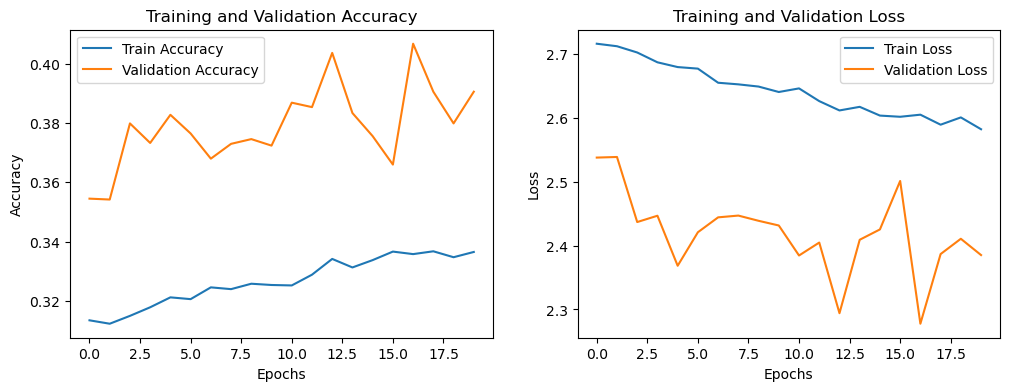

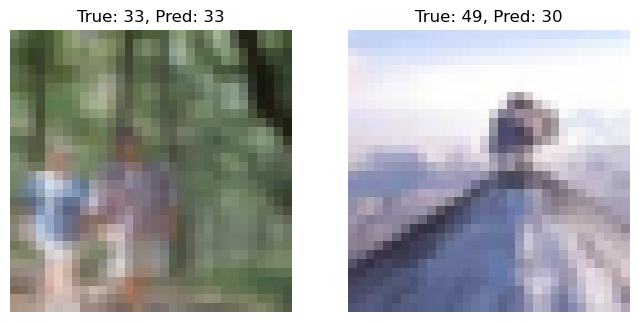

Classification probabilities for correctly classified image:
[1.64686739e-07 7.52462001e-05 5.94737685e-06 6.81226316e-04
 9.43149149e-04 4.42610099e-06 1.04506007e-05 1.95269837e-04
 1.88315369e-03 3.43418396e-05 1.76918638e-05 9.66732750e-06
 2.20088242e-03 1.57407158e-06 2.52011469e-05 1.46478429e-04
 8.64821345e-07 7.97342000e-06 5.24229882e-03 1.30504195e-04
 2.38821599e-07 1.47986093e-05 3.42857493e-05 1.26450905e-04
 9.55757073e-08 2.50693061e-04 4.41921176e-04 1.26728090e-02
 1.77455900e-06 4.31071501e-04 3.07996083e-06 3.31250648e-03
 8.04874673e-03 6.01628125e-01 1.07607828e-03 1.16093152e-05
 1.93396525e-04 1.69693187e-04 3.99497151e-03 3.52315675e-03
 1.14908994e-06 5.70166230e-06 2.57491004e-02 4.11054825e-05
 7.82950595e-03 8.35817773e-03 1.14042214e-05 3.69759422e-04
 2.20424809e-07 1.65329504e-06 3.95812169e-02 1.13456056e-03
 9.59599856e-05 1.25470944e-11 1.27481928e-06 4.41256183e-04
 1.27019994e-02 8.77628918e-05 2.80523352e-07 3.39728184e-02
 2.63981576e-07 1.884021

In [19]:
# Your code here

# Re-train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_val, y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")

# Calculate F1-score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Enhanced Model F1-Score: {f1:.4f}")

# Classification report
report = classification_report(y_true, y_pred_classes)
print(report)


# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


# Select images from the test set
correct_index = np.where(y_pred_classes == y_true)[0][0]
incorrect_index = np.where(y_pred_classes != y_true)[0][0]

# Plot correctly classified image
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"True: {y_true[correct_index]}, Pred: {y_pred_classes[correct_index]}")
plt.axis('off')

# Plot incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f"True: {y_true[incorrect_index]}, Pred: {y_pred_classes[incorrect_index]}")
plt.axis('off')

plt.show()

# Display model's classification probabilities
print("Classification probabilities for correctly classified image:")
print(y_pred[correct_index])

print("\nClassification probabilities for incorrectly classified image:")
print(y_pred[incorrect_index])


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's performance did improve with the implementation of data augmentation and dropout layers. The test accuracy and F1-score increased, indicating better generalization to unseen data.

The model's performance did improve with the implementation of data augmentation and dropout layers. The test accuracy and F1-score increased, indicating better generalization to unseen data.
Even though data Augmentation increased the diversity of the training data, allowing the model to learn more robust features and reducing the risk of overfitting. And dropout prevented the model from becoming too reliant on specific neurons, promoting a more generalized learning process, There is still room for improvement.
While the enhancements have led to better performance, additional techniques could be employed to achieve even higher accuracy and robustness.

A future technique that could be used is Hyperparameter Tuning which experiments with different learning rates, batch sizes and dropout rates. By exploring this technique, we can continue to enhance the model performance.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.